# Results analysis

#### dataset Loading and options 

In [2]:
from datasets import Dataset,load_dataset
import pandas as pd
import seaborn as sb

#dataset_split_name ="simpleLLM_benchmark_llama3.18binstant_pk_1_t_0.7" 
#dataset_split_name ="simpleLLM_benchmark_llama3.370bversatile_pk_1_t_0.7"
#dataset_split_name ="simpleLLM_benchmark_llama370b8192_pk_1_t_0.7"
#dataset_split_name ="simpleLLM_benchmark_mixtral8x7b32768_pk_1_t_0.7" 
#dataset_split_name = "simpleLLM_benchmark_deepseekr1distillllama70b_pk_1_t_0.7"
dataset_split_name = "simpleLLM_benchmark_deepseekr1distillllama70b_pk_5_t_1.5"
dataset_split = [dataset_split_name][0]

dataset = load_dataset("CharlyR/varbench-evaluation", dataset_split, split="tikz")
import os

result_path = os.path.join("results",dataset_split_name)
not os.path.exists("results/"+dataset_split_name) and os.mkdir("results/"+dataset_split_name)


Generating tikz split: 100%|██████████| 50/50 [00:00<00:00, 1601.75 examples/s]


In [9]:
dataset

Dataset({
    features: ['id', 'code', 'instruction', 'result_description', 'difficulty', 'patch', 'code_solution', 'image_solution', 'image_input', 'original_predictions', 'predictions', 'image_result_indexes', 'images_result', 'parsing_score', 'compiling_score', 'predictions_patches', 'ChrfPatchMetric', 'TERMetric', 'PSNRMetric', 'FeatureMatchMetric', 'ClipTextMetric', 'BleuPatchMetric', 'LineMetric', 'MSEMetric', 'TERPatchMetric', 'LPIPSMetric', 'ChrfMetric', 'ClipImageMetric', 'BleuMetric', 'PatchMetric', 'MSSSIMMetric', 'CrystalBleuPatchMetric', 'CrystalBleuMetric'],
    num_rows: 50
})

## Best prediction computation

---
Best prediction is computed but not used for now, passk list is flattened later and metrics computed on all of them

In [10]:
from results_utils import MetricPolicy
import pandas as pd

computed_metrics_names = [
    metric_name
    for metric_name in dataset.column_names
    if metric_name.endswith("Metric")
]


# each metric is computed on list of predictions of length pass@k, and yields a list of list of result of the same length.
# from that list[list[float]](the results), we get the best result according to a certain policy(here the arithmetic mean)
subset = dataset.map(
    MetricPolicy.compute_best_prediction,
    fn_kwargs={"computed_metrics_names": computed_metrics_names},
)

scores = {
    metric_name: sum(subset[f"best_{metric_name}"]) / len(subset)
    for metric_name in computed_metrics_names
}
scores["var_score"] = sum(subset["var_score"]) / len(subset)
print(scores)#average of each best predicted score => NOTE: For all the instances where nothing compile, every best score is put to zero, reducing the other scores by a lot
result_df:pd.DataFrame = subset.to_pandas()

Map: 100%|██████████| 50/50 [00:00<00:00, 610.36 examples/s]

{'ChrfPatchMetric': 42.68090678215027, 'TERMetric': 76.8350090789795, 'PSNRMetric': 39.241211013793944, 'FeatureMatchMetric': 59.503702583312986, 'ClipTextMetric': 22.04150402069092, 'BleuPatchMetric': 25.879073054790496, 'LineMetric': 38.66666664123535, 'MSEMetric': 85.29656860351562, 'TERPatchMetric': 52.22560546875, 'LPIPSMetric': 81.33444396972656, 'ChrfMetric': 76.25102175474167, 'ClipImageMetric': 85.18134384155273, 'BleuMetric': 73.80109986555962, 'PatchMetric': 2.0, 'MSSSIMMetric': 77.1566100692749, 'CrystalBleuPatchMetric': 24.893867524564268, 'CrystalBleuMetric': 72.24366882326235, 'var_score': 55.01366488799419}


In [11]:
result_df

,id,code,instruction,result_description,difficulty,patch,code_solution,image_solution,image_input,original_predictions,...,best_MSEMetric,best_TERPatchMetric,best_LPIPSMetric,best_ChrfMetric,best_ClipImageMetric,best_BleuMetric,best_PatchMetric,best_MSSSIMMetric,best_CrystalBleuPatchMetric,best_CrystalBleuMetric
0,donkey_higher_mane,"\documentclass[tikz,border=5]{standalone}\n\us...",Make the mane of the donkey go upward a little...,A donkey with a high mane over its head,hard,"@@ -61,2 +61,2 @@\n- to [bend left] ++( 16, ...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[\nAlright, so I need to help the user modify ...",...,99.919479,81.609192,98.778687,98.974251,99.881607,9.746762e+01,0.0,98.461563,62.712006,9.654050e+01
1,chimpanzee_squint_crosseyes,"\documentclass[tikz,border=5]{standalone}\n\us...","Make the eyes of the chimpanzee crossed, by ma...",A crossed-eyes chimpanzee,medium,"@@ -29,2 +29,4 @@\n-\foreach \i in {-1,1}- \f...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[\n\nTo make the chimpanzee's eyes crossed, th...",...,94.900139,50.000000,88.349487,84.120422,97.732956,8.040064e+01,0.0,29.432211,2.950456,7.678000e+01
2,bee_red_stripes,"\documentclass[tikz,border=5]{standalone}\n\us...",Change the color of the stripes to red,A bee with red stripes,easy,"@@ -25,2 +25,2 @@\n- on left= {colors alias={...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[<think>\nOkay, so I need to figure out how to...",...,100.000000,100.000000,100.000000,100.000000,99.999985,1.000000e+02,100.0,100.000000,100.000000,1.000000e+02
3,shark_no_teeth,"\documentclass[tikz,border=5]{standalone}\n\us...",Remove the teeth of the shark,A shark with no teeth,easy,"@@ -7,6 +6,0 @@\n-\fill [BlueGrey200]- (2,16....","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[\n\nAlright, let me tackle this problem. So, ...",...,99.992546,85.416664,99.101311,99.748505,99.023544,9.922645e+01,0.0,99.640160,80.650124,9.899413e+01
4,shark_other_set_pectoral_fin,"\documentclass[tikz,border=5]{standalone}\n\us...","Add another set of pectoral fin to the shark, ...",A shark with two sets of pectoral fins,hard,"@@ -16,0 +17,6 @@\n+\fill [BlueGrey700] (11,10...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[\n\nOkay, let's see. The user wants to add an...",...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00
5,dog_red_eyes,"\documentclass[tikz,border=5]{standalone}\n\us...",Change the colors of the dog's eyes to red,A dog with red eyes,easy,"@@ -51 +51 @@\n- \fill [BlueGrey900] (56, 0) ...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[<think>\nOkay, so I need to change the colors...",...,99.700508,65.384613,96.380119,98.786095,98.475906,9.872820e+01,0.0,97.625702,45.068081,9.769375e+01
6,monkey_sad,"\documentclass[tikz,border=5]{standalone}\n\us...","Make the monkey sad, by turning the shape of i...","A sad monkey, with its a downturned mouth",easy,"@@ -48,2 +48 @@\n- (-96,-72) arc (180:360:96 ...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[<think>\nAlright, I need to figure out how to...",...,99.540771,82.142860,94.017387,99.645660,95.701309,9.869879e+01,0.0,94.492584,71.096680,9.823796e+01
7,squid_bigger_eyes,"\documentclass[tikz,border=5]{standalone}\n\us...",Make the eyes of the sq

## Pre-Filtering

In [12]:
# filtering by having a result
filtered_df = result_df[result_df["index_best_prediction"] != -1]

# ordering by text metrics
text_metrics = [
    metric_name
    for metric_name in computed_metrics_names
    if any((substring in metric_name) for substring in ["TER", "Line", "Bleu", "Chrf","Patch"])
]
other_metrics = list(set(computed_metrics_names) - set(text_metrics))
ordered_metrics = ["best_"+metric for metric in (text_metrics + other_metrics)]
print(text_metrics + other_metrics)

filtered_df = filtered_df[ordered_metrics + ["id", "difficulty"]]
filtered_df

['ChrfPatchMetric', 'TERMetric', 'BleuPatchMetric', 'LineMetric', 'TERPatchMetric', 'ChrfMetric', 'BleuMetric', 'PatchMetric', 'CrystalBleuPatchMetric', 'CrystalBleuMetric', 'PSNRMetric', 'MSSSIMMetric', 'FeatureMatchMetric', 'ClipImageMetric', 'MSEMetric', 'ClipTextMetric', 'LPIPSMetric']


,best_ChrfPatchMetric,best_TERMetric,best_BleuPatchMetric,best_LineMetric,best_TERPatchMetric,best_ChrfMetric,best_BleuMetric,best_PatchMetric,best_CrystalBleuPatchMetric,best_CrystalBleuMetric,best_PSNRMetric,best_MSSSIMMetric,best_FeatureMatchMetric,best_ClipImageMetric,best_MSEMetric,best_ClipTextMetric,best_LPIPSMetric,id,difficulty
0,82.917809,97.832817,65.865028,50.000000,81.609192,98.974251,9.746762e+01,0.0,62.712006,9.654050e+01,48.019768,98.461563,72.727272,99.881607,99.919479,22.835827,98.778687,donkey_higher_mane,hard
1,34.742664,83.944954,3.834791,0.000000,50.000000,84.120422,8.040064e+01,0.0,2.950456,7.678000e+01,36.755791,29.432211,28.378378,97.732956,94.900139,24.872187,88.349487,chimpanzee_squint_crosseyes,medium
2,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.0,100.000000,1.000000e+02,100.000000,100.000000,100.000000,99.999985,100.000000,27.442711,100.000000,bee_red_stripes,easy
3,92.931259,99.588478,82.468903,100.000000,85.416664,99.748505,9.922645e+01,0.0,80.650124,9.899413e+01,54.845272,99.640160,89.130432,99.023544,99.992546,24.504738,99.101311,shark_no_teeth,easy
5,81.661247,98.795181,48.022461,100.000000,65.384613,98.786095,9.872820e+01,0.0,45.068081,9.769375e+01,45.709614,97.625702,82.258064,98.475906,99.700508,25.587341,96.380119,dog_red_eyes,easy
6,88.389381,98.461540,73.119125,100.000000,82.142860,99.645660,9.869879e+01,0.0,71.096680,9.823796e+01,41.852318,94.492584,88.571426,95.701309,99.540771,27.825899,94.017387,monkey_sad,easy
7,66.116615,98.755188,51.495579,0.000000,70.491806,99.338219,9.827264e+01,0.0,49.251080,9.776590e+01,44.856487,96.788017,71.084335,99.803421,99.449020,27.057854,98.755104,squid_bigger_eyes,medium
8,88.661110,97.237572,63.917538,100.000000,71.014496,98.385330,9.630105e+01,0.0,63.498093,9.307527e+01,39.101273,84.314728,64.000000,98.813950,99.484528,26.856770,94.975876,chimpanzee_blue_fur,easy
9,6.076378,98.407646,0.207541,0.000000,50.588234,98.969276,9.792570e+01,0.0,0.249743,9.690828e+01,41.205509,91.159698,39.534885,98.835304,99.171448,26.445419,95.000381,cow_longer_horns,medium
10,22.784067,94.308945,3.375615,0.000000,51.515152,97.510696,9.567380e+01,0.0,3.171958,9.320844e+01,38.768307,68.743782,40.963856,97.999565,96.176575,28.686222,73.252350,squid_O_mouth,medium


## Passing rate

In [13]:
def compute_pass(row):
    
    row["pass"] = row["compiling_score"]!=0
    return row
pass_dataset = result_df[["difficulty","id","compiling_score"]].apply(compute_pass,axis=1)


In [14]:
pass_dataset

,difficulty,id,compiling_score,pass
0,hard,donkey_higher_mane,1.0,True
1,medium,chimpanzee_squint_crosseyes,0.2,True
2,easy,bee_red_stripes,0.8,True
3,easy,shark_no_teeth,0.8,True
4,hard,shark_other_set_pectoral_fin,0.0,False
5,easy,dog_red_eyes,1.0,True
6,easy,monkey_sad,0.6,True
7,medium,squid_bigger_eyes,1.0,True
8,easy,chimpanzee_blue_fur,1.0,True
9,medium,cow_longer_horns,0.4,True


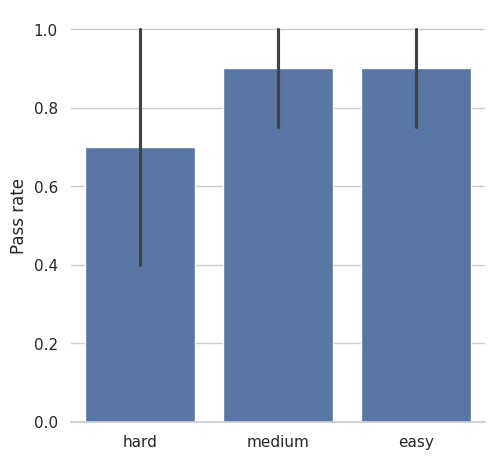

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=pass_dataset, kind="bar",
    x="difficulty", y="pass"
)
g.despine(left=True)
g.set_axis_labels("", "Pass rate")
g.legend.set_title("")
plt.savefig(os.path.join(result_path,"pass_rate_difficulty.png"), dpi=300, bbox_inches="tight")


## no subcategories

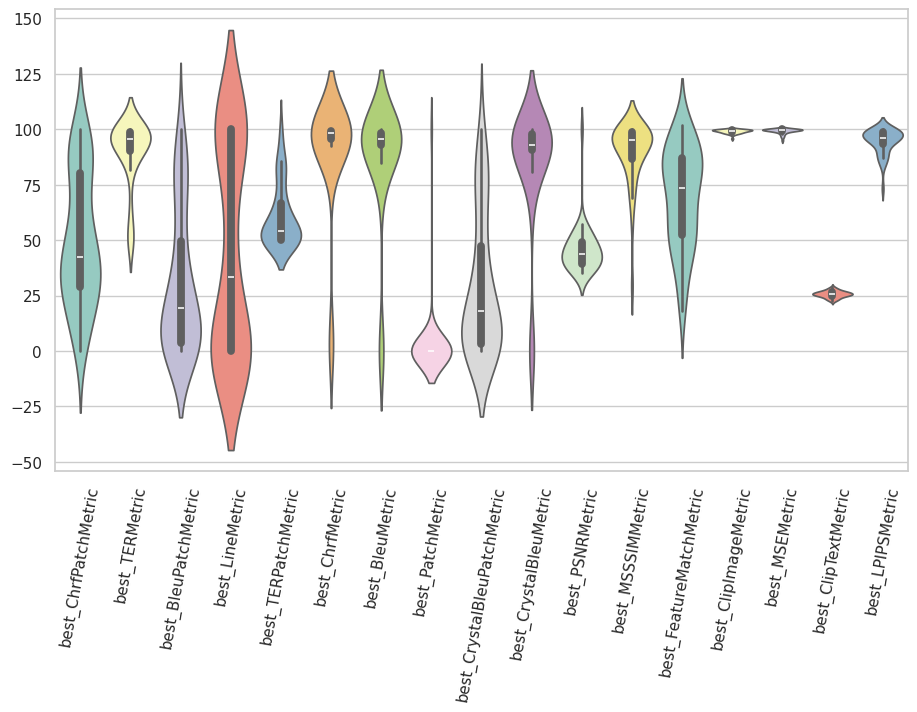

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))
plt.xticks(rotation=80)

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=filtered_df, palette="Set3")#,order=order)
plt.savefig(os.path.join(result_path,"violin_all_metrics.png"), dpi=300, bbox_inches="tight")


In [17]:
filtered_df[filtered_df.columns.difference(['difficulty','id'])].mean(axis=0)

best_BleuMetric                85.815232
best_BleuPatchMetric           30.091945
best_ChrfMetric                88.663979
best_ChrfPatchMetric           49.628961
best_ClipImageMetric           99.048074
best_ClipTextMetric            25.629656
best_CrystalBleuMetric         84.004266
best_CrystalBleuPatchMetric    28.946358
best_FeatureMatchMetric        69.190352
best_LPIPSMetric               94.574935
best_LineMetric                44.961240
best_MSEMetric                 99.182057
best_MSSSIMMetric              89.716988
best_PSNRMetric                45.629315
best_PatchMetric                2.325581
best_TERMetric                 89.343034
best_TERPatchMetric            60.727448
dtype: float64

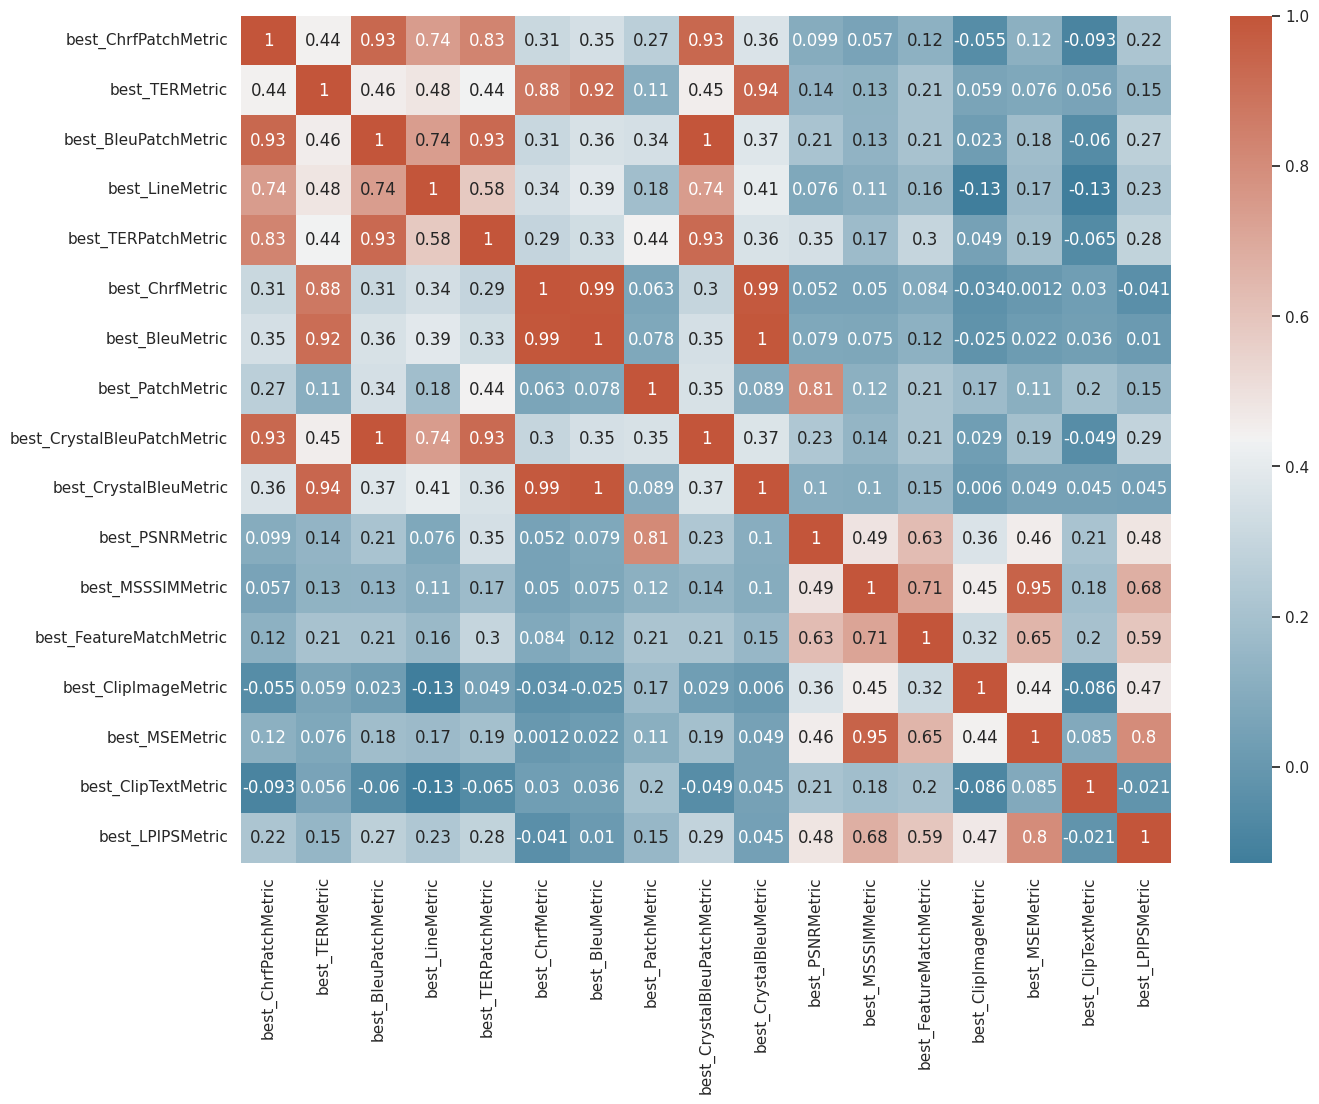

In [18]:
#TODO move that to metricbench and measure the correlation on the exploded dataset
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = filtered_df.select_dtypes(["int","float"]).corr()


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, annot=True)
plt.savefig(os.path.join(result_path,"heatmap_correlation.png"), dpi=300, bbox_inches="tight")


## filtered by difficulty

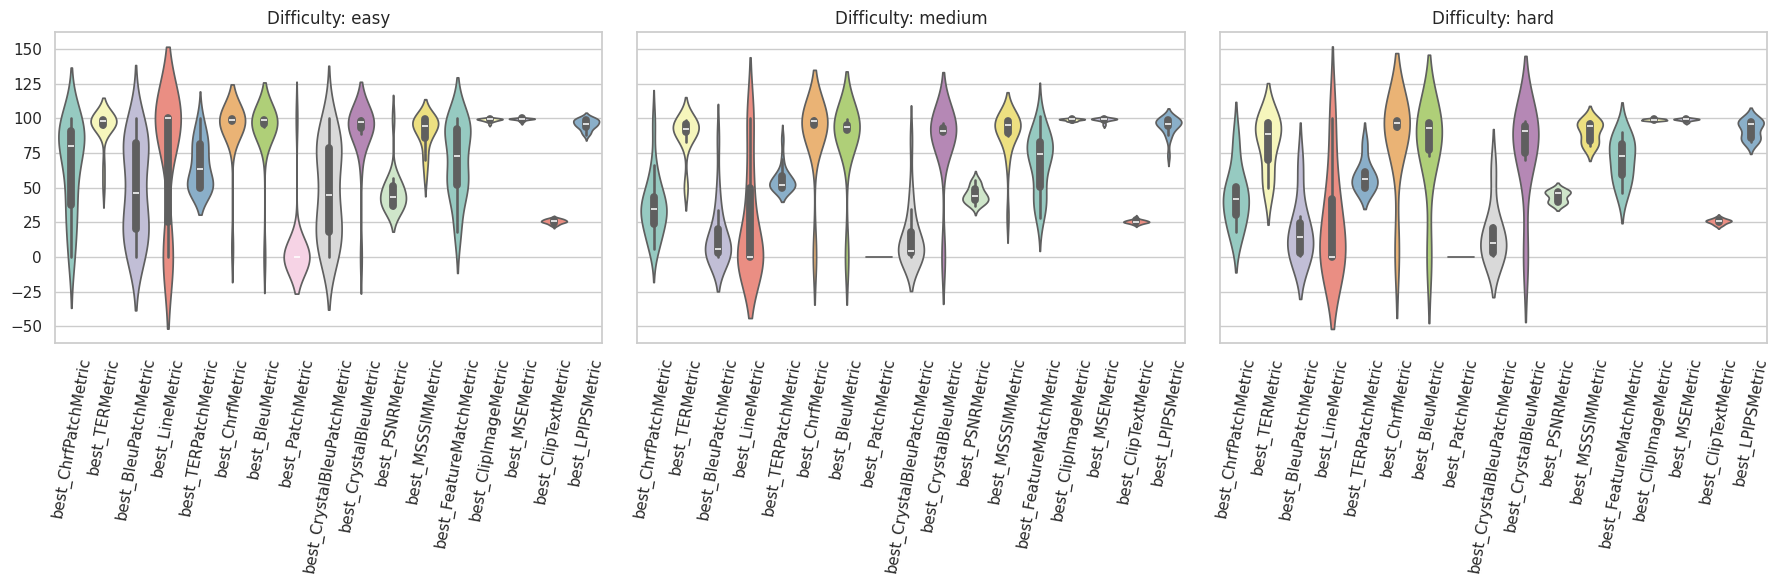

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

df_difficulty = filtered_df.drop("id",axis=1)
df_difficulty

sns.set_theme(style="whitegrid")

# Assuming 'difficulty' column exists in the DataFrame
difficulties = ['easy', 'medium', 'hard']
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Create 3 subplots

for i, difficulty in enumerate(difficulties):
    sns.violinplot(
        data=df_difficulty[df_difficulty['difficulty'] == difficulty], 
        ax=axes[i], 
        palette="Set3"
    )
    axes[i].set_title(f'Difficulty: {difficulty}')
    axes[i].tick_params(axis='x', rotation=80)

plt.tight_layout()
plt.savefig(os.path.join(result_path,"violin_by_difficulty.png"), dpi=300, bbox_inches="tight")
plt.show()


In [20]:
df_difficulty['difficulty'] = pd.Categorical(df_difficulty['difficulty'], categories=['easy', 'medium', 'hard'], ordered=True)
averages = df_difficulty.groupby('difficulty',observed=True).mean()
averages.to_csv(os.path.join(result_path,"avg_by_difficulty.csv"))

averages

,best_ChrfPatchMetric,best_TERMetric,best_BleuPatchMetric,best_LineMetric,best_TERPatchMetric,best_ChrfMetric,best_BleuMetric,best_PatchMetric,best_CrystalBleuPatchMetric,best_CrystalBleuMetric,best_PSNRMetric,best_MSSSIMMetric,best_FeatureMatchMetric,best_ClipImageMetric,best_MSEMetric,best_ClipTextMetric,best_LPIPSMetric
difficulty,,,,,,,,,,,,,,,,,
easy,65.012072,93.479434,48.462225,72.222222,66.235447,93.016145,91.647064,5.555556,47.313759,89.557791,47.056598,90.149961,69.691050,98.965508,99.335762,25.675836,95.790769
medium,36.648737,88.225581,15.899351,25.000000,56.052647,86.328504,83.452561,0.000000,15.180979,81.800976,44.958559,89.062217,68.340973,99.119555,99.063326,25.555405,94.353383
hard,43.450110,81.580027,19.349327,26.190476,58.584939,83.478200,76.894533,0.000000,17.112583,75.389377,43.683959,90.287327,70.086959,99.076582,99.092121,25.701840,92.018207


In [21]:
med = df_difficulty.groupby('difficulty',observed=True).median()
med.to_csv(os.path.join(result_path,"med_by_difficulty.csv"))
med

,best_ChrfPatchMetric,best_TERMetric,best_BleuPatchMetric,best_LineMetric,best_TERPatchMetric,best_ChrfMetric,best_BleuMetric,best_PatchMetric,best_CrystalBleuPatchMetric,best_CrystalBleuMetric,best_PSNRMetric,best_MSSSIMMetric,best_FeatureMatchMetric,best_ClipImageMetric,best_MSEMetric,best_ClipTextMetric,best_LPIPSMetric
difficulty,,,,,,,,,,,,,,,,,
easy,80.444996,98.278389,45.892994,100.0,63.247862,99.173340,98.675724,0.0,44.540283,97.479362,43.483578,94.789242,73.129032,99.433170,99.679619,25.700832,96.136589
medium,34.928419,92.679810,5.772942,0.0,52.146465,97.890869,93.792614,0.0,4.464803,90.950047,43.752079,95.354763,74.602543,99.324963,99.599232,25.406018,96.065945
hard,42.154415,88.612099,14.328884,0.0,56.481480,96.623741,93.302132,0.0,10.176217,90.567055,46.257153,94.866653,72.727272,98.990059,99.566216,26.114388,95.737762
